In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#Initial data reading, cleaning, and splitting
cleanedFile = r"../DataSets\4.10.24DuplicatesRemoved.csv"
DF = pd.read_csv(cleanedFile)

DF.dropna(axis='index', how='any', inplace=True)

train_set, test_set = train_test_split(DF, test_size=0.3, random_state=0)
print(DF.keys())

'''
X = DF[['latitude', 'longitude', 'floorSize']]
y = DF['price']

X_train = train_set[['latitude', 'longitude', 'floorSize']]
y_train = train_set['price']

X_test = test_set[['latitude', 'longitude', 'floorSize']]
y_test = test_set['price']
'''

Index(['latitude', 'longitude', 'floorSize', 'price', 'url'], dtype='object')


"\nX = DF[['latitude', 'longitude', 'floorSize']]\ny = DF['price']\n\nX_train = train_set[['latitude', 'longitude', 'floorSize']]\ny_train = train_set['price']\n\nX_test = test_set[['latitude', 'longitude', 'floorSize']]\ny_test = test_set['price']\n"

## Linear Regression

Train R^2 Score: 0.2776582035769648
Train RMSE: 594353.9797940397
Test R^2 Score: 0.6800233694196798
Test RMSE: 218441.5507820041


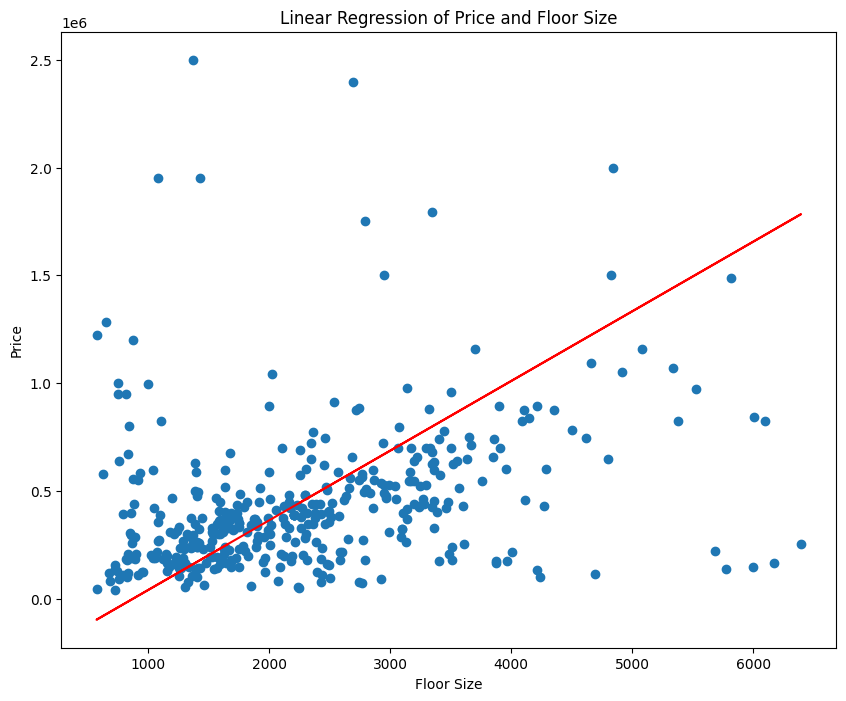

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

X_LR = DF[['floorSize']]
y_LR = DF['price']

max_floor_size_index = X_LR['floorSize'].idxmax()
max_price_index = y_LR.idxmax()

# Getting rid of extreme outliers
X_LR = X_LR.drop(index=max_floor_size_index)
y_LR = y_LR.drop(index=max_price_index)

X_train_LR = train_set[['floorSize']]
y_train_LR = train_set['price']
X_test_LR = test_set[['floorSize']]
y_test_LR = test_set['price']

LR = LinearRegression()
LR.fit(X_train_LR, y_train_LR)

y_predicted_LR_train = LR.predict(X_train_LR)
print("Train R^2 Score:", LR.score(X_train_LR, y_train_LR))
print("Train RMSE:", sqrt(mean_squared_error(y_train_LR, y_predicted_LR_train)))

y_predicted_LR_test = LR.predict(X_test_LR)
print("Test R^2 Score:", LR.score(X_test_LR, y_test_LR))
print("Test RMSE:", sqrt(mean_squared_error(y_test_LR, y_predicted_LR_test)))

plt.figure(figsize=(10, 8))
plt.scatter(X_LR, y_LR)
plt.title("Linear Regression of Price and Floor Size")
plt.xlabel("Floor Size")
plt.ylabel("Price")
plt.plot(X_LR, LR.predict(X_LR), color='red')
plt.show()


## K-means Clustering

Centroids are: [[-2.33760252e+05  2.74291934e+02  2.58460541e-01]
 [ 3.91722600e+05 -1.75395642e+03  4.93879116e-02]
 [ 1.51674356e+06  1.26276053e+03  1.65367696e+00]
 [-1.34778006e+04 -3.24889984e+02  1.31486889e+00]
 [ 6.61745425e+05 -5.87894670e+02 -8.63432232e-01]
 [ 1.56506894e+05 -7.28765022e+01  5.29006207e-01]
 [ 1.06674044e+06  1.79259422e+03 -2.02694906e-01]
 [-1.03298602e+05 -1.53133004e+02  4.62489479e-01]
 [-3.48260271e+05  1.24924975e+02  9.07666821e-01]
 [ 2.06674385e+06  1.90501392e+03  2.01192957e+00]
 [ 2.56641688e+05  2.30833230e+02  1.12441933e+00]
 [ 8.13673966e+04 -2.67950884e+02  7.07560569e-03]
 [ 5.16692015e+05  4.65207773e+02  1.37794678e+00]
 [-1.73760624e+05  4.92596542e+02  9.03665712e-01]
 [-2.93518516e+05 -1.68855009e+02  1.12388494e+00]
 [ 1.31674308e+06  1.16657703e+03  1.66047496e+00]
 [ 8.49643656e+05  3.17303177e+02  1.49956532e+00]
 [ 4.61742646e+05  1.58918611e+02 -1.25250957e+00]
 [ 2.62182094e+04 -6.41283451e+02  1.34833683e+00]
 [-5.83268574e+0

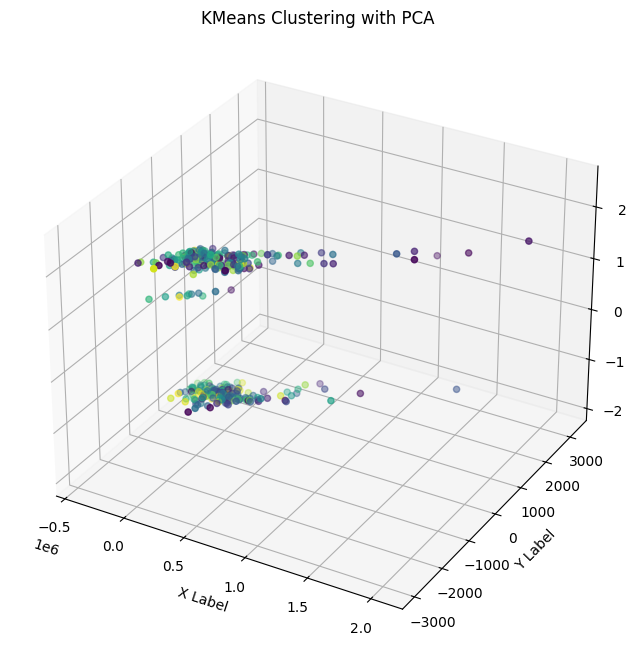

In [4]:
# Your code
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

DF_Kmeans = pd.read_csv(cleanedFile)


X_DF_Kmeans = DF_Kmeans[['price', 'floorSize', 'longitude', 'latitude']]

max_floor_size_index = X_DF_Kmeans['floorSize'].idxmax()
max_price_index = X_DF_Kmeans['price'].idxmax()

#getting ride of extreme outliers, they make the graph ugly
X_DF_Kmeans = X_DF_Kmeans.drop(index=max_floor_size_index)
X_DF_Kmeans = X_DF_Kmeans.drop(index=max_price_index)

X_DF_Kmeans.describe()

pca = PCA(n_components = 3)
X_DF_Kmeans_transformed = pca.fit_transform(X_DF_Kmeans)

KMC = KMeans(n_clusters=160)


KMC.fit(X_DF_Kmeans_transformed)
y_predict_X_DF_Kmeans_transformed = KMC.predict(X_DF_Kmeans_transformed)
print("Centroids are:", KMC.cluster_centers_)
print("The final distortion is:", KMC.inertia_)
print(silhouette_score(X_DF_Kmeans_transformed, KMC.predict(X_DF_Kmeans_transformed)))


#####################################

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X_DF_Kmeans_transformed[:, 0], X_DF_Kmeans_transformed[:, 1], X_DF_Kmeans_transformed[:, 2], c=y_predict_X_DF_Kmeans_transformed)
plt.title('KMeans Clustering with PCA')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel

plt.show()

Centroids are: [[-1.63001917e+05  8.55788539e+01  1.83311653e-02]
 [ 2.43667383e+05 -3.00932599e+02 -1.25502126e-01]
 [ 1.17122206e+06  8.18541111e+02  6.81107666e-01]]
The final distortion is: 8608765190229.747
0.5951100245486818


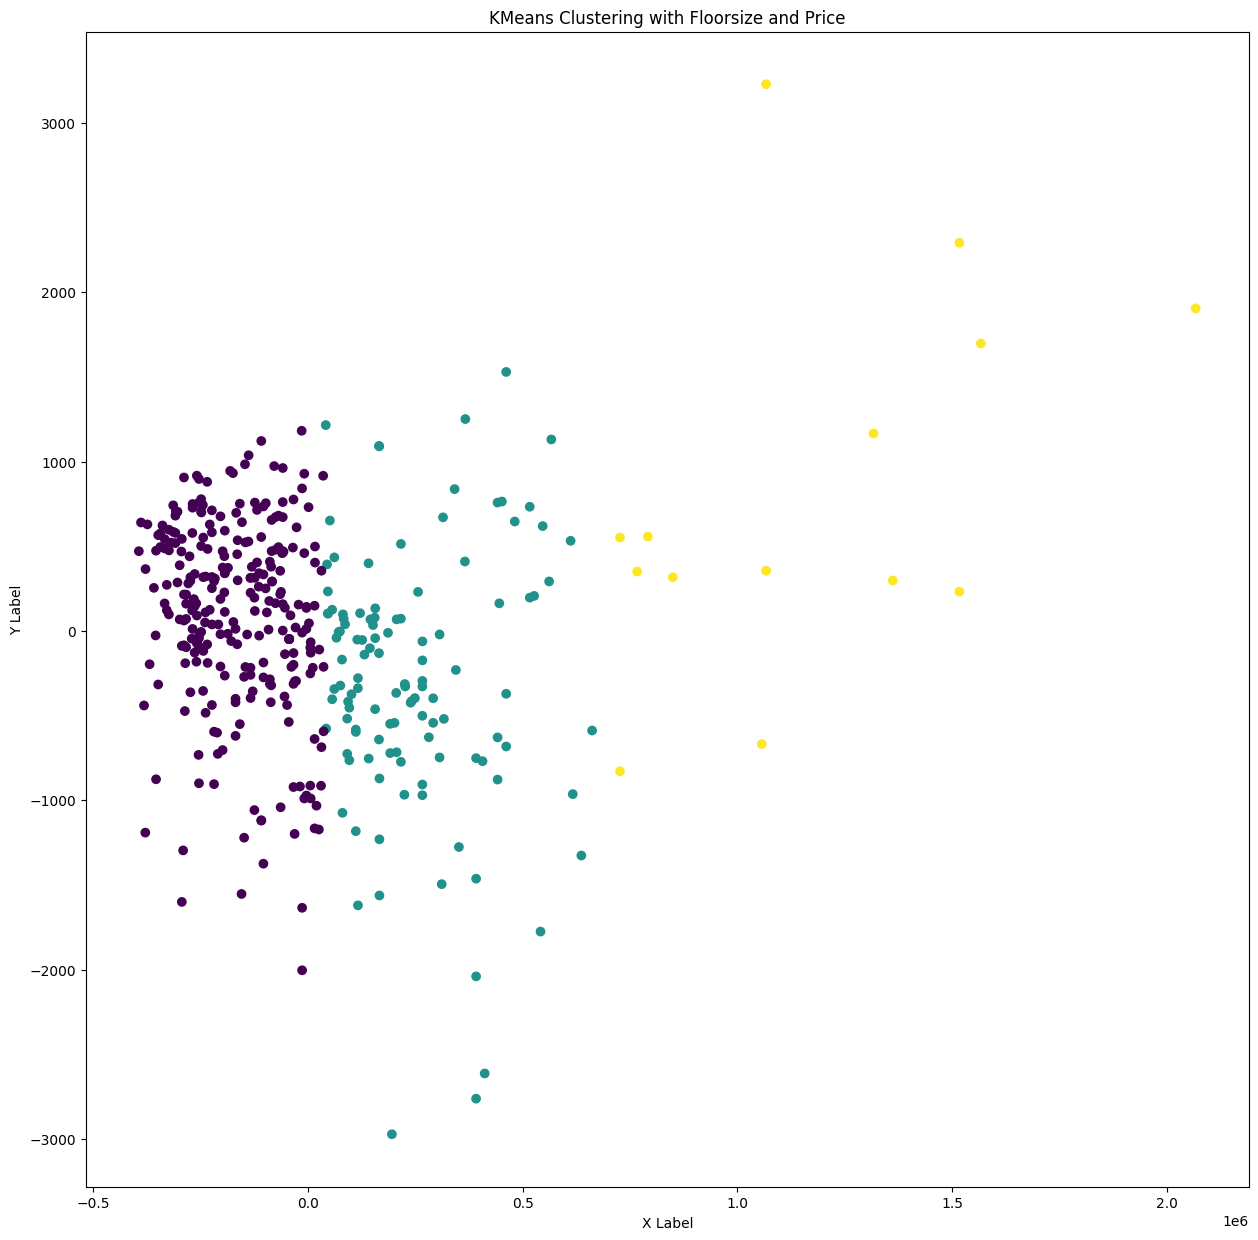

In [5]:
# Your code
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

DF_Kmeans = pd.read_csv(cleanedFile)


X_DF_Kmeans = DF_Kmeans[['price', 'floorSize']]

max_floor_size_index = X_DF_Kmeans['floorSize'].idxmax()
max_price_index = X_DF_Kmeans['price'].idxmax()

#getting ride of extreme outliers, they make the graph ugly
X_DF_Kmeans = X_DF_Kmeans.drop(index=max_floor_size_index)
X_DF_Kmeans = X_DF_Kmeans.drop(index=max_price_index)

X_DF_Kmeans.describe()


KMC = KMeans(n_clusters=3)


KMC.fit(X_DF_Kmeans_transformed)
y_predict_X_DF_Kmeans_transformed = KMC.predict(X_DF_Kmeans_transformed)
print("Centroids are:", KMC.cluster_centers_)
print("The final distortion is:", KMC.inertia_)
print(silhouette_score(X_DF_Kmeans_transformed, KMC.predict(X_DF_Kmeans_transformed)))


#####################################

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)


ax.scatter(X_DF_Kmeans_transformed[:, 0], X_DF_Kmeans_transformed[:, 1], c=y_predict_X_DF_Kmeans_transformed)
plt.title('KMeans Clustering with Floorsize and Price')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

plt.show()

## Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

X_train_DT = train_set[['latitude', 'longitude', 'floorSize']]
y_train_DT = train_set['price']

X_test_DT = test_set[['latitude', 'longitude', 'floorSize']]
y_test_DT = test_set['price']

DTCWholeSet = DecisionTreeClassifier()
DTCWholeSet.fit(X_train_DT, y_train_DT)

DTC = DecisionTreeClassifier()
DTC.fit(X_train_DT, y_train_DT)

y_predicted_DT = DTC.predict(X_train_DT)
matrix_DT = confusion_matrix(y_train_DT, y_predicted_DT)
print(matrix_DT)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy", accuracy_score(y_train_DT, y_predicted_DT))
print("Precision", precision_score(y_train_DT, y_predicted_DT, average='weighted'))
print("Sensitivity", recall_score(y_train_DT, y_predicted_DT, average='weighted'))
print("F1", f1_score(y_train_DT, y_predicted_DT, average='weighted'))

y_test_predict_DT = DTC.predict(X_test_DT)
matrixTest_DT = confusion_matrix(y_test_DT, y_test_predict_DT)

print(matrixTest_DT)
print("Accuracy", accuracy_score(y_test_DT, y_test_predict_DT))
print("F1", f1_score(y_test_DT, y_test_predict_DT, average='weighted'))



[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]
Accuracy 1.0
Precision 1.0
Sensitivity 1.0
F1 1.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.05737704918032787
F1 0.05425448868071819


^ Classic decision tree overfitting, I didn't give it any bounds

Decision tree 5 fold validation

In [7]:
# Your code here
from sklearn.model_selection import StratifiedKFold

X_DT_Kfold = DF[['latitude', 'longitude', 'floorSize']]
y_DT_Kfold = DF['price']

X_train_DT_Kfold = train_set[['latitude', 'longitude', 'floorSize']]
y_train_DT_Kfold = train_set['price']

X_test_DT_Kfold = test_set[['latitude', 'longitude', 'floorSize']]
y_test_DT_Kfold = test_set['price']

spliter = StratifiedKFold(n_splits = 5, shuffle=True)


for train_indices, validate_indices in spliter.split(X_DT_Kfold, y_DT_Kfold):
    DTC = DecisionTreeClassifier()
    
    X_train_DT_Kfold = X_DT_Kfold.iloc[train_indices]
    y_train_DT_Kfold = y_DT_Kfold.iloc[train_indices]
    
    DTC.fit(X_train_DT_Kfold, y_train_DT_Kfold)
    
    X_validate_DT_Kfold = X_DT_Kfold.iloc[validate_indices]
    y_validate_DT_Kfold = y_DT_Kfold.iloc[validate_indices]
    
    y_predicted_DT_Kfold = DTC.predict(X_validate_DT_Kfold)
    
    matrix_DT_Kfold = confusion_matrix(y_validate_DT_Kfold, y_predicted_DT_Kfold)
    
    print(matrix_DT_Kfold)
    print("Accuracy", accuracy_score(y_validate_DT_Kfold, y_predicted_DT_Kfold))
    print("F1", f1_score(y_validate_DT_Kfold, y_predicted_DT_Kfold, average='weighted'))
    print()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.024390243902439025
F1 0.024390243902439025

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.037037037037037035
F1 0.03292181069958847

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.037037037037037035
F1 0.037037037037037035

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.0
F1 0.0

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.037037037037037035
F1 0.022633744855967076



c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


## SVM Linear

In [8]:
# Your code here
from sklearn.svm import SVC
SVM_L = SVC()

X_train_SVM_L = train_set[['latitude', 'longitude', 'floorSize']]
y_train_SVM_L = train_set['price']

X_test_SVM_L = test_set[['latitude', 'longitude', 'floorSize']]
y_test_SVM_L = test_set['price']

SVM_L.fit(X_train_SVM_L, y_train_SVM_L)
y_train_predict_SVM_L = SVM_L.predict(X_train_SVM_L)
matrixTrain_SVM_L = confusion_matrix(y_train_SVM_L, y_train_predict_SVM_L)

print(matrixTrain_SVM_L)
print("Accuracy", accuracy_score(y_train_SVM_L, y_train_predict_SVM_L))
print("F1", f1_score(y_train_SVM_L, y_train_predict_SVM_L, average='weighted'))

y_test_predict_SVM_L = SVM_L.predict(X_test_SVM_L)
matrixTest_SVM_L = confusion_matrix(y_test_SVM_L, y_test_predict_SVM_L)

print(matrixTest_SVM_L)
print("Accuracy", accuracy_score(y_test_SVM_L, y_test_predict_SVM_L))
print("F1", f1_score(y_test_SVM_L, y_test_predict_SVM_L, average='weighted'))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.03873239436619718
F1 0.006184138744205024
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.0
F1 0.0


SVM 5 fold validation

In [9]:
from sklearn.model_selection import StratifiedKFold

X_SVM_L_Kfold = DF[['latitude', 'longitude', 'floorSize']]
y_SVM_L_Kfold = DF['price']

X_train_SVM_L_Kfold = train_set[['latitude', 'longitude', 'floorSize']]
y_train_SVM_L_Kfold = train_set['price']

X_test_SVM_L_Kfold = test_set[['latitude', 'longitude', 'floorSize']]
y_test_SVM_L_Kfold = test_set['price']

spliter = StratifiedKFold(n_splits = 5)

for train_indices, validate_indices in spliter.split(X_SVM_L_Kfold, y_SVM_L_Kfold):
    SVM_L_Kfold = SVC()
    
    X_train_SVM_L_Kfold = X_SVM_L_Kfold.iloc[train_indices]
    y_train_SVM_L_Kfold = y_SVM_L_Kfold.iloc[train_indices]
    
    SVM_L_Kfold.fit(X_train_SVM_L_Kfold, y_train_SVM_L_Kfold)
    
    X_validate_SVM_L_Kfold = X_SVM_L_Kfold.iloc[validate_indices]
    y_validate_SVM_L_Kfold = y_SVM_L_Kfold.iloc[validate_indices]
    
    y_predicted_SVM_L_Kfold = SVM_L_Kfold.predict(X_validate_SVM_L_Kfold)
    
    matrix_SVM_L_Kfold = confusion_matrix(y_validate_SVM_L_Kfold, y_predicted_SVM_L_Kfold)
    
    print(matrix_SVM_L_Kfold)
    print("Accuracy", accuracy_score(y_validate_SVM_L_Kfold, y_predicted_SVM_L_Kfold))
    print("F1", f1_score(y_validate_SVM_L_Kfold, y_predicted_SVM_L_Kfold, average='weighted'))
    print()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]
Accuracy 0.024390243902439025


c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


F1 0.0019222285246108274

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.04938271604938271
F1 0.007505388986870468

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.012345679012345678
F1 0.0005611672278338945

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.012345679012345678
F1 0.0004841442749939482

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
Accuracy 0.024691358024691357
F1 0.0020685579196217494



## RBF SVM

In [10]:
from sklearn.svm import SVC
SVM_RBF = SVC(kernel = 'rbf')

X_train_RBF = train_set[['latitude', 'longitude', 'floorSize']]
y_train_RBF = train_set['price']

X_test_RBF = test_set[['latitude', 'longitude', 'floorSize']]
y_test_RBF = test_set['price']

SVM_RBF.fit(X_train_RBF, y_train_RBF)
y_train_predict_RBF = SVM_RBF.predict(X_train_RBF)
matrixTrain_RBF = confusion_matrix(y_train_RBF, y_train_predict_RBF)
print(matrixTrain_RBF)
print("Accuracy", accuracy_score(y_train_RBF, y_train_predict_RBF))
print("F1", f1_score(y_train_RBF, y_train_predict_RBF, average='weighted'))

y_test_predict_RBF = SVM_RBF.predict(X_test_RBF)
matrixTest_RBF = confusion_matrix(y_test_RBF, y_test_predict_RBF)
print(matrixTest_RBF)
print("Accuracy", accuracy_score(y_test_RBF, y_test_predict_RBF))
print("F1", f1_score(y_test_RBF, y_test_predict_RBF, average='weighted'))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.03873239436619718
F1 0.006184138744205024
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.0
F1 0.0


RBF SVM 5 fold validation

In [11]:
from sklearn.model_selection import StratifiedKFold

X_RBF_Kfold = DF[['latitude', 'longitude', 'floorSize']]
y_RBF_Kfold = DF['price']

X_train_RBF_Kfold = train_set[['latitude', 'longitude', 'floorSize']]
y_train_RBF_Kfold = train_set['price']

X_test_RBF_Kfold = test_set[['latitude', 'longitude', 'floorSize']]
y_test_RBF_Kfold = test_set['price']

spliter = StratifiedKFold(n_splits = 5)

for train_indices, validate_indices in spliter.split(X_RBF_Kfold, y_RBF_Kfold):
    SVM_RBF_Kfold = SVC(kernel='rbf')
    
    X_train_RBF_Kfold = X_RBF_Kfold.iloc[train_indices]
    y_train_RBF_Kfold = y_RBF_Kfold.iloc[train_indices]
    
    SVM_RBF_Kfold.fit(X_train_RBF_Kfold, y_train_RBF_Kfold)
    
    X_validate_RBF_Kfold = X_RBF_Kfold.iloc[validate_indices]
    y_validate_RBF_Kfold = y_RBF_Kfold.iloc[validate_indices]
    
    y_predicted_RBF_Kfold = SVM_RBF_Kfold.predict(X_validate_RBF_Kfold)
    
    matrix_RBF_Kfold = confusion_matrix(y_validate_RBF_Kfold, y_predicted_RBF_Kfold)
    
    print(matrix_RBF_Kfold)
    print("Accuracy", accuracy_score(y_validate_RBF_Kfold, y_predicted_RBF_Kfold))
    print("F1", f1_score(y_validate_RBF_Kfold, y_predicted_RBF_Kfold, average='weighted'))
    print()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]
Accuracy 0.024390243902439025
F1 0.0019222285246108274



c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.04938271604938271
F1 0.007505388986870468

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.012345679012345678
F1 0.0005611672278338945

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.012345679012345678
F1 0.0004841442749939482

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
Accuracy 0.024691358024691357
F1 0.0020685579196217494



## Poly SVM

In [12]:
from sklearn.svm import SVC
SVM_Poly = SVC(kernel='poly')

X_Poly = DF[['latitude', 'longitude', 'floorSize']]
y_Poly = DF['price']

X_train_Poly = train_set[['latitude', 'longitude', 'floorSize']]
y_train_Poly = train_set['price']

X_test_Poly = test_set[['latitude', 'longitude', 'floorSize']]
y_test_Poly = test_set['price']

SVM_Poly.fit(X_train_Poly, y_train_Poly)
y_train_predict_Poly = SVM_Poly.predict(X_train_Poly)
matrixTrain_Poly = confusion_matrix(y_train_Poly, y_train_predict_Poly)
print(matrixTrain_Poly)
print("Accuracy", accuracy_score(y_train_Poly, y_train_predict_Poly))
print("F1", f1_score(y_train_Poly ,y_train_predict_Poly, average='weighted'))


y_test_predict_Poly = SVM_Poly.predict(X_test_Poly)
matrixTest_Poly = confusion_matrix(y_test_Poly, y_test_predict_Poly)
print(matrixTest_Poly)
print("Accuracy", accuracy_score(y_test_Poly, y_test_predict_Poly))
print("F1", f1_score(y_test_Poly, y_test_predict_Poly, average='weighted'))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Accuracy 0.0528169014084507
F1 0.019081935091340877
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.0
F1 0.0


Poly SVM 5 fold validation

In [13]:
from sklearn.model_selection import StratifiedKFold

X_Poly_Kfold = DF[['latitude', 'longitude', 'floorSize']]
y_Poly_Kfold = DF['price']

X_train_Poly_Kfold = train_set[['latitude', 'longitude', 'floorSize']]
y_train_Poly_Kfold = train_set['price']

X_test_Poly_Kfold = test_set[['latitude', 'longitude', 'floorSize']]
y_test_Poly_Kfold = test_set['price']

spliter = StratifiedKFold(n_splits = 5)

for train_indices, validate_indices in spliter.split(X_Poly_Kfold, y_Poly_Kfold):
    SVM_Poly_Kfold = SVC(kernel='poly')
    
    X_train_Poly_Kfold = X_Poly_Kfold.iloc[train_indices]
    y_train_Poly_Kfold = y_Poly_Kfold.iloc[train_indices]
    
    SVM_Poly_Kfold.fit(X_train_Poly_Kfold,y_train_Poly_Kfold)
    
    X_validate_Poly_Kfold = X_Poly_Kfold.iloc[validate_indices]
    y_validate_Poly_Kfold = y_Poly_Kfold.iloc[validate_indices]
    
    y_predicted_Poly_Kfold = SVM_Poly_Kfold.predict(X_validate_Poly_Kfold)
    
    matrix_Poly_Kfold = confusion_matrix(y_validate_Poly_Kfold, y_predicted_Poly_Kfold)
    
    print(matrix_Poly_Kfold)
    print("Accuracy", accuracy_score(y_validate_Poly_Kfold,y_predicted_Poly_Kfold))
    print("F1", f1_score(y_validate_Poly_Kfold, y_predicted_Poly_Kfold, average='weighted'))
    print()

c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]
Accuracy 0.024390243902439025
F1 0.009105691056910567

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
Accuracy 0.024691358024691357
F1 0.005198180636777128

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.012345679012345678
F1 0.001299545159194282

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.024691358024691357
F1 0.0019085107651935348

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
Accuracy 0.012345679012345678
F1 0.0008818342151675485



## Sigmoid SVM

In [14]:
from sklearn.svm import SVC
SVM_Sig = SVC(kernel='sigmoid')

X_train_Sig = train_set[['latitude', 'longitude', 'floorSize']]
y_train_Sig = train_set['price']

X_test_Sig = test_set[['latitude', 'longitude', 'floorSize']]
y_test_Sig = test_set['price']

SVM_Sig.fit(X_train_Sig, y_train_Sig)
y_train_predict_Sig = SVM_Sig.predict(X_train_Sig)
matrixTrain_Sig = confusion_matrix(y_train_Sig, y_train_predict_Sig)
print(matrixTrain_Sig)
print("Accuracy", accuracy_score(y_train_Sig, y_train_predict_Sig))
print("F1", f1_score(y_train_Sig ,y_train_predict_Sig, average='weighted'))

y_test_predict_Sig = SVM_Sig.predict(X_test_Sig)
matrixTest_Sig = confusion_matrix(y_test_Sig, y_test_predict_Sig)
print(matrixTest_Sig)
print("Accuracy", accuracy_score(y_test_Sig, y_test_predict_Sig))
print("F1", f1_score(y_test_Sig, y_test_predict_Sig, average='weighted'))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.017605633802816902
F1 0.0006091914810663288
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.0
F1 0.0


Sigmoid SVM 5 fold validation

In [15]:
from sklearn.model_selection import StratifiedKFold

X_Sig_Kfold = DF[['latitude', 'longitude', 'floorSize']]
y_Sig_Kfold = DF['price']

X_train_Sig_Kfold = train_set[['latitude', 'longitude', 'floorSize']]
y_train_Sig_Kfold = train_set['price']

X_test_Sig_Kfold = test_set[['latitude', 'longitude', 'floorSize']]
y_test_Sig_Kfold = test_set['price']

spliter = StratifiedKFold(n_splits = 5)

for train_indices, validate_indices in spliter.split(X_Sig_Kfold, y_Sig_Kfold):
    SVM_Sig_Kfold = SVC(kernel='sigmoid')
    
    X_train_Sig_Kfold = X_Sig_Kfold.iloc[train_indices]
    y_train_Sig_Kfold = y_Sig_Kfold.iloc[train_indices]
    
    SVM_Sig_Kfold.fit(X_train_Sig_Kfold,y_train_Sig_Kfold)
    
    X_validate_Sig_Kfold = X_Sig_Kfold.iloc[validate_indices]
    y_validate_Sig_Kfold = y_Sig_Kfold.iloc[validate_indices]
    
    y_predicted_Sig_Kfold = SVM_Sig_Kfold.predict(X_validate_Sig_Kfold)
    
    matrix_Sig_Kfold = confusion_matrix(y_validate_Sig_Kfold, y_predicted_Sig_Kfold)
    
    print(matrix_Sig_Kfold)
    print("Accuracy", accuracy_score(y_validate_Sig_Kfold,y_predicted_Sig_Kfold))
    print("F1", f1_score(y_validate_Sig_Kfold, y_predicted_Sig_Kfold, average='weighted'))
    print()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.012195121951219513


c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


F1 0.0002938583602703497

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.037037037037037035
F1 0.005110411791602786

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.012345679012345678
F1 0.00030111412225233364

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.012345679012345678
F1 0.00030111412225233364

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.012345679012345678
F1 0.00030111412225233364



## Stochastic Gradient Descent

In [16]:
# Your code here
from sklearn.linear_model import SGDClassifier

X_train_SGD = train_set[['latitude', 'longitude', 'floorSize']]
y_train_SGD = train_set['price']

X_test_SGD = test_set[['latitude', 'longitude', 'floorSize']]
y_test_SGD = test_set['price']

SGD = SGDClassifier()

SGD.fit(X_train_SGD, y_train_SGD)
y_train_predict_SGD = SGD.predict(X_train_SGD)
matrixTrain_SGD = confusion_matrix(y_train_SGD, y_train_predict_SGD)
print(matrixTrain_SGD)
print("Accuracy", accuracy_score(y_train_SGD, y_train_predict_SGD))
print("F1", f1_score(y_train_SGD, y_train_predict_SGD, average='weighted'))

y_test_predict_SGD = SGD.predict(X_test_SGD)
matrixTest_SGD = confusion_matrix(y_test_SGD, y_test_predict_SGD)
print(matrixTest_SGD)
print("Accuracy", accuracy_score(y_test_SGD, y_test_predict_SGD))
print("F1", f1_score(y_test_SGD, y_test_predict_SGD, average='weighted'))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.014084507042253521
F1 0.00039123630672926443
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.0
F1 0.0


Stochastic Gradient Descent 5 fold validation

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import SGDClassifier

X_SGD_Kfold = DF[['latitude', 'longitude', 'floorSize']]
y_SGD_Kfold = DF['price']

X_train_SGD_Kfold = train_set[['latitude', 'longitude', 'floorSize']]
y_train_SGD_Kfold = train_set['price']

X_test_SGD_Kfold = test_set[['latitude', 'longitude', 'floorSize']]
y_test_SGD_Kfold = test_set['price']

spliter = StratifiedKFold(n_splits = 5)

for train_indices, validate_indices in spliter.split(X_SGD_Kfold, y_SGD_Kfold):
    SGD_Kfold = SGDClassifier()
    
    X_train_SGD_Kfold = X_SGD_Kfold.iloc[train_indices]
    y_train_SGD_Kfold = y_SGD_Kfold.iloc[train_indices]
    
    SGD_Kfold.fit(X_train_SGD_Kfold, y_train_SGD_Kfold)
    
    X_validate_SGD_Kfold = X_SGD_Kfold.iloc[validate_indices]
    y_validate_SGD_Kfold = y_SGD_Kfold.iloc[validate_indices]
    
    y_predicted_SGD_Kfold = SGD_Kfold.predict(X_validate_SGD_Kfold)
    
    matrix_SGD_Kfold = confusion_matrix(y_validate_SGD_Kfold, y_predicted_SGD_Kfold)
    
    print(matrix_SGD_Kfold)
    print("Accuracy", accuracy_score(y_validate_SGD_Kfold, y_predicted_SGD_Kfold))
    print("F1", f1_score(y_validate_SGD_Kfold, y_predicted_SGD_Kfold, average='weighted'))
    print()

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.0
F1 0.0



c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
Accuracy 0.0
F1 0.0

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.0
F1 0.0

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.0
F1 0.0

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.0
F1 0.0



## Random Forest

In [18]:
# Your code here
from sklearn.ensemble import RandomForestClassifier

X_train_RF = train_set[['latitude', 'longitude', 'floorSize']]
y_train_RF = train_set['price']

X_test_RF = test_set[['latitude', 'longitude', 'floorSize']]
y_test_RF = test_set['price']

RFC = RandomForestClassifier(max_depth=8, random_state=42)

RFC.fit(X_train_RF, y_train_RF)
y_train_predict_RF = RFC.predict(X_train_RF)
matrixTrain_RF = confusion_matrix(y_train_RF, y_train_predict_RF)
print(matrixTrain_RF)
print("Accuracy", accuracy_score(y_train_RF, y_train_predict_RF))
print("F1", f1_score(y_train_RF, y_train_predict_RF, average='weighted'))

y_test_predict_RF = RFC.predict(X_test_RF)
matrixTest_RF = confusion_matrix(y_test_RF, y_test_predict_RF)
print(matrixTest_RF)
print("Accuracy", accuracy_score(y_test_RF, y_test_predict_RF))
print("F1", f1_score(y_test_RF, y_test_predict_RF, average='weighted'))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]
Accuracy 0.971830985915493
F1 0.9637918419608559
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.040983606557377046
F1 0.03734061930783242


Random Forest 5 fold validation

In [19]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

X_RF_Kfold = DF[['latitude', 'longitude', 'floorSize']]
y_RF_Kfold = DF['price']

X_train_RF_Kfold = train_set[['latitude', 'longitude', 'floorSize']]
y_train_RF_Kfold = train_set['price']

X_test_RF_Kfold = test_set[['latitude', 'longitude', 'floorSize']]
y_test_RF_Kfold = test_set['price']

spliter = StratifiedKFold(n_splits = 5)

for train_indices, validate_indices in spliter.split(X_RF_Kfold, y_RF_Kfold):
    RFC_Kfold = RandomForestClassifier()
    
    X_train_RF_Kfold = X_RF_Kfold.iloc[train_indices]
    y_train_RF_Kfold = y_RF_Kfold.iloc[train_indices]
    
    RFC_Kfold.fit(X_train_RF_Kfold,y_train_RF_Kfold)
    
    X_validate_RF_Kfold = X_RF_Kfold.iloc[validate_indices]
    y_validate_RF_Kfold = y_RF_Kfold.iloc[validate_indices]
    
    y_predicted_RF_Kfold = RFC_Kfold.predict(X_validate_RF_Kfold)
    
    matrix_RF_Kfold = confusion_matrix(y_validate_RF_Kfold, y_predicted_RF_Kfold)
    
    print(matrix_RF_Kfold)
    print("Accuracy", accuracy_score(y_validate_RF_Kfold,y_predicted_RF_Kfold))
    print("F1", f1_score(y_validate_RF_Kfold, y_predicted_RF_Kfold, average='weighted'))
    print()

c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
Accuracy 0.024390243902439025
F1 0.02032520325203252

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.037037037037037035
F1 0.030864197530864196

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.037037037037037035
F1 0.037037037037037035

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
Accuracy 0.06172839506172839
F1 0.06172839506172839

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.04938271604938271
F1 0.037037037037037035



In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score


X_train_MLP = train_set[['latitude', 'longitude', 'floorSize']]
y_train_MLP = train_set['price']

X_test_MLP = test_set[['latitude', 'longitude', 'floorSize']]
y_test_MLP = test_set['price']

MLP = MLPClassifier()


MLP.fit(X_train_MLP, y_train_MLP)
y_train_predict_MLP = MLP.predict(X_train_MLP)
matrixTrain_MLP = confusion_matrix(y_train_MLP, y_train_predict_MLP)
print(matrixTrain_MLP)
print("Accuracy", accuracy_score(y_train_MLP, y_train_predict_MLP))
print("F1", f1_score(y_train_MLP ,y_train_predict_MLP, average='weighted'))

y_test_predict_MLP = MLP.predict(X_test_MLP)
matrixTest_MLP = confusion_matrix(y_test_MLP, y_test_predict_MLP)
print(matrixTest_MLP)
print("Accuracy", accuracy_score(y_test_MLP, y_test_predict_MLP))
print("F1", f1_score(y_test_MLP, y_test_predict_MLP, average='weighted'))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
Accuracy 0.04225352112676056
F1 0.004085290322372256
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
Accuracy 0.00819672131147541
F1 0.0006557377049180328


In [22]:
from sklearn.model_selection import StratifiedKFold

X_MLP = DF[['latitude', 'longitude', 'floorSize']]
y_MLP = DF['price']

spliter = StratifiedKFold(n_splits = 5)

for train_indices, validate_indices in spliter.split(X_MLP, y_MLP):
    MLP = MLPClassifier()
    X_train_MLP = X_MLP.iloc[train_indices]
    y_train_MLP = y_MLP.iloc[train_indices]
    MLP.fit(X_train_MLP, y_train_MLP)
    X_validate_MLP = X_MLP.iloc[validate_indices]
    y_validate_MLP = y_MLP.iloc[validate_indices]
    y_predicted_MLP = MLP.predict(X_validate_MLP)
    matrix_MLP = confusion_matrix(y_validate_MLP, y_predicted_MLP)
    print(matrix_MLP)
    print("Accuracy", accuracy_score(y_validate_MLP,y_predicted_MLP))
    print("F1", f1_score(y_validate_MLP, y_predicted_MLP, average='weighted'))
    print()

c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.0
F1 0.0

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.012345679012345678
F1 0.0011757789535567313

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.0
F1 0.0

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.012345679012345678
F1 0.001899335232668566

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.012345679012345678
F1 0.0006331117442228553

